In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import glob as glob

from sklearn.model_selection import train_test_split

from keras.layers import Dense
from keras.models import Sequential
from keras.preprocessing import image


In [3]:
seed = 42
rng = np.random.RandomState(seed)

In [4]:
df = pd.read_csv('P:/Applied machine learning/Neural Networks/Emergency vs non emergency/emergency_classification/emergency_classification.csv')

In [7]:
X = []
for img_name in df.image_names:
    image = plt.imread('P:/Applied machine learning/Neural Networks/Emergency vs non emergency/emergency_classification/images/'+img_name)
    X.append(image)
    
X = np.array(X)

y = df.emergency_or_not.values

In [8]:
#before sending the data to model, change it to single shape so nn can take it.
X = X.reshape(2352,224*224*3)

In [9]:
#to bring the values in range 0 to 1, we divide values with max
X = X/X.max()

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.3, random_state=seed)

In [12]:
from keras.activations import sigmoid

In [15]:
model = Sequential()

#hidden layer
model.add(Dense(100,activation='sigmoid' ,input_dim=224*224*3))
#input layer
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val,y_val))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 17s 10ms/step - loss: 0.8235 - accuracy: 0.5583 - val_loss: 0.6478 - val_accuracy: 0.6657
Epoch 2/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6393 - accuracy: 0.6507 - val_loss: 0.6550 - val_accuracy: 0.5921
Epoch 3/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6219 - accuracy: 0.6549 - val_loss: 0.6402 - val_accuracy: 0.6331
Epoch 4/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6116 - accuracy: 0.6731 - val_loss: 0.6287 - val_accuracy: 0.6416
Epoch 5/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6121 - accuracy: 0.6683 - val_loss: 0.6138 - val_accuracy: 0.6657
Epoch 6/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.5842 - accuracy: 0.7072 - val_loss: 0.5906 - val_accuracy: 0.6799
Epoch 7/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6026 - ac

29 % that is emergency
whereas actual class is 1


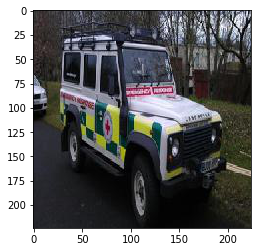

In [22]:
#get predictions
predictions = model.predict_classes(X_val)[:,0]
prediction_probabilities = model.predict(X_val)[:,0]

#pull out the original images which correspond to validation data
_, valid_vehicles, _, valid_y = train_test_split(df.image_names.values,y,test_size=0.3,random_state= seed)

#get a random index to plot image randomly
index = rng.choice(range(len(valid_vehicles)))

#get the corresponding image name and probability
img_name = valid_vehicles[index]
prob = (prediction_probabilities*100).astype(int)[index]

#read the image
img = plt.imread('P:/Applied machine learning/Neural Networks/Emergency vs non emergency/emergency_classification/images/'+img_name)

#print the probablity and actual class
print(prob,'% that is emergency')
print('whereas actual class is',valid_y[index])

#plot image
plt.imshow(img)

In [23]:
#checking where our model is incorrect
incorrect_indices = np.where(predictions != y_val)[0]

In [24]:
len(incorrect_indices),predictions.shape

(224, (706,))

41 % it is emergency
whereas the actual class is 1


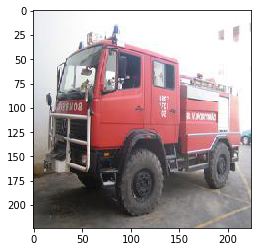

In [30]:
index = rng.choice(incorrect_indices)
img_name = valid_vehicles[index]
prob =(prediction_probabilities*100).astype(int)[index]

img = plt.imread('P:/Applied machine learning/Neural Networks/Emergency vs non emergency/emergency_classification/images/'+img_name)

print(prob,'% it is emergency')
print('whereas the actual class is',y_val[index])

plt.imshow(img)

In [31]:
#Tuning to improve performance. changing to tanh

model = Sequential()

#hidden layer
model.add(Dense(100,activation='tanh' ,input_dim=224*224*3))
#input layer
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val,y_val))

#tanh has no significant change

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 11s 7ms/step - loss: 4.0588 - accuracy: 0.4283 - val_loss: 1.6158 - val_accuracy: 0.4391
Epoch 2/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.9061 - accuracy: 0.4526 - val_loss: 0.6873 - val_accuracy: 0.5609
Epoch 3/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6803 - accuracy: 0.5851 - val_loss: 0.6870 - val_accuracy: 0.5609
Epoch 4/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6792 - accuracy: 0.5857 - val_loss: 0.6866 - val_accuracy: 0.5609
Epoch 5/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6747 - accuracy: 0.5857 - val_loss: 0.6794 - val_accuracy: 0.5609
Epoch 6/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6718 - accuracy: 0.5851 - val_loss: 0.6779 - val_accuracy: 0.5609
Epoch 7/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6686 - acc

In [32]:
#Tuning to improve performance. increasing neurons in hidden layer

model = Sequential()

#hidden layer
model.add(Dense(1024,activation='sigmoid' ,input_dim=224*224*3))
#input layer
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val,y_val))

#still model is not good. 

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 116s 70ms/step - loss: 1.5060 - accuracy: 0.5134 - val_loss: 0.7433 - val_accuracy: 0.4802
Epoch 2/10
1646/1646 [==============================] - 39s 24ms/step - loss: 0.7079 - accuracy: 0.6015 - val_loss: 0.6270 - val_accuracy: 0.6487
Epoch 3/10
1646/1646 [==============================] - 40s 24ms/step - loss: 0.6888 - accuracy: 0.5881 - val_loss: 0.6621 - val_accuracy: 0.5779
Epoch 4/10
1646/1646 [==============================] - 43s 26ms/step - loss: 0.6237 - accuracy: 0.6580 - val_loss: 0.6174 - val_accuracy: 0.6374
Epoch 5/10
1646/1646 [==============================] - 37s 22ms/step - loss: 0.6230 - accuracy: 0.6719 - val_loss: 0.6110 - val_accuracy: 0.6671
Epoch 6/10
1646/1646 [==============================] - 36s 22ms/step - loss: 0.6050 - accuracy: 0.6646 - val_loss: 0.6124 - val_accuracy: 0.6686
Epoch 7/10
1646/1646 [==============================] - 36s 22ms/step - loss

In [33]:
#Tuning to improve performance. increasing epochs

model = Sequential()

#hidden layer
model.add(Dense(100,activation='tanh' ,input_dim=224*224*3))
#input layer
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val,y_val))

Train on 1646 samples, validate on 706 samples
Epoch 1/20
1646/1646 [==============================] - 8s 5ms/step - loss: 2.5440 - accuracy: 0.5747 - val_loss: 1.4305 - val_accuracy: 0.5609
Epoch 2/20
1646/1646 [==============================] - 8s 5ms/step - loss: 0.8713 - accuracy: 0.5863 - val_loss: 0.6903 - val_accuracy: 0.5609
Epoch 3/20
1646/1646 [==============================] - 8s 5ms/step - loss: 0.6783 - accuracy: 0.5863 - val_loss: 0.6852 - val_accuracy: 0.5609
Epoch 4/20
1646/1646 [==============================] - 8s 5ms/step - loss: 0.6756 - accuracy: 0.5863 - val_loss: 0.6797 - val_accuracy: 0.5609
Epoch 5/20
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6659 - accuracy: 0.5863 - val_loss: 0.6741 - val_accuracy: 0.5609
Epoch 6/20
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6597 - accuracy: 0.5893 - val_loss: 0.6595 - val_accuracy: 0.5609
Epoch 7/20
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6494 - accu

In [34]:
#Tuning to improve performance. changing to tanh

model = Sequential()

#hidden layer
model.add(Dense(1024,activation='sigmoid' ,input_dim=224*224*3))
#input layer
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val,y_val))

Train on 1646 samples, validate on 706 samples
Epoch 1/20
1646/1646 [==============================] - 187s 114ms/step - loss: 1.4782 - accuracy: 0.5352 - val_loss: 0.7164 - val_accuracy: 0.5127
Epoch 2/20
1646/1646 [==============================] - 35s 22ms/step - loss: 0.7250 - accuracy: 0.5450 - val_loss: 0.6288 - val_accuracy: 0.6445
Epoch 3/20
1646/1646 [==============================] - 35s 21ms/step - loss: 0.6324 - accuracy: 0.6482 - val_loss: 0.6104 - val_accuracy: 0.6742
Epoch 4/20
1646/1646 [==============================] - 34s 21ms/step - loss: 0.6077 - accuracy: 0.6817 - val_loss: 0.5996 - val_accuracy: 0.6756
Epoch 5/20
1646/1646 [==============================] - 34s 20ms/step - loss: 0.6109 - accuracy: 0.6695 - val_loss: 0.6914 - val_accuracy: 0.5864
Epoch 6/20
1646/1646 [==============================] - 34s 21ms/step - loss: 0.6034 - accuracy: 0.6798 - val_loss: 0.5838 - val_accuracy: 0.6870
Epoch 7/20
1646/1646 [==============================] - 35s 21ms/step - los

In [35]:
from keras.optimizers import Adam

In [36]:
adam = Adam(lr=1e-5)

In [38]:
#Tuning to improve performance. changing epochs, optimizer and adding one more hidden layer with more neurons

model = Sequential()

#hidden layer
model.add(Dense(1024,activation='sigmoid' ,input_dim=224*224*3))
model.add(Dense(1024,activation='sigmoid'))
#input layer
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val,y_val))

SyntaxError: invalid syntax (<ipython-input-38-9b8f6a074a23>, line 9)